In [1]:
import pandas as pd
from IPython import display

In [2]:
df = pd.read_csv("my_new_scrape_file.csv") #File got from scrape_data.py

In [3]:
df.shape

(2582, 7)

In [4]:
df.head()

,Unnamed: 0,house_type,bedroom,bathroom,price,all_info,info_text
0,0,Basement,Bedrooms: 2,Bathrooms: 1,"$1,400","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
1,1,Apartment,Bedrooms: 2,Bathrooms: 2,"$2,395","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nNot Included\nWi...
2,2,Condo,Bedrooms: 2,Bathrooms: 2,"$3,300","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
3,3,Condo,Bedrooms: 2,Bathrooms: 2.5,"$2,100","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
4,4,Townhouse,Bedrooms: 3,Bathrooms: 2.5,"$2,499","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...


In [5]:
#Checking eror links
def find_eror(x):
    if x[0]=='<':
        return x
    else:
        return "Fail"

In [6]:
df["test"] = df["all_info"].apply(lambda x: find_eror(x))

In [7]:
df2 = df[df["test"]!="Fail"] # just dropping it

## After checking fails i get answer that links were error we will drop that section 253 eror was we have 2572 data its not going to affect to much

In [8]:
df2.drop('test',axis=1,inplace=True)

/home/tural/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df2.head()

,Unnamed: 0,house_type,bedroom,bathroom,price,all_info,info_text
0,0,Basement,Bedrooms: 2,Bathrooms: 1,"$1,400","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
1,1,Apartment,Bedrooms: 2,Bathrooms: 2,"$2,395","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nNot Included\nWi...
2,2,Condo,Bedrooms: 2,Bathrooms: 2,"$3,300","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
3,3,Condo,Bedrooms: 2,Bathrooms: 2.5,"$2,100","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...
4,4,Townhouse,Bedrooms: 3,Bathrooms: 2.5,"$2,499","<div class=""gradientScrollContainer-3063824911...",Overview\nUtilities Included\nHydro\nHeat\nWat...


In [10]:
#finding hydro,heat,water I decided to take html content than scrape it (for that reason i got all_info) beacouse 
# it was so hart to take included or not 

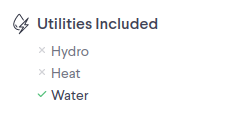

In [11]:
display.Image("explt_scrp.png")

In [12]:
def hydro(x):
    index_result = x.find("Hydro")
    val = index_result - 4
    result = x[val]
    if index_result==-1:
        return "Not Included"
    elif result=="e":
        return "Yes"
    elif result=="N":
        return "No"
def heat(x):
    index_result = x.find("Heat")
    val = index_result - 4
    result = x[val]
    if index_result==-1:
        return "Not Included"
    elif result=="e":
        return "Yes"
    elif result=="N":
        return "No"
def water(x):
    index_result = x.find("Water")
    val = index_result - 4
    result = x[val]
    if index_result==-1:
        return "Not Included"
    elif result=="e":
        return "Yes"
    elif result=="N":
        return "No"

In [13]:
water(df2["all_info"][300])

'Not Included'

In [14]:
test = df2["all_info"][0]

In [15]:
df2["Hydro"] = df2["all_info"].apply(lambda x: hydro(x))

/home/tural/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [16]:
df2["Water"] = df2["all_info"].apply(lambda x: water(x))
df2["Heat"] = df2["all_info"].apply(lambda x: heat(x))

In [17]:
df3 = df2.drop("all_info",axis=1)

In [18]:
def wifi_more(x):
    contetn = str(x).split("\n")
    a = contetn.index('Wi-Fi and More') +1
    b = contetn.index('Parking Included')
    return contetn[a:b]

In [19]:
def size(x):
    find_size = str(x).split("\n")
    s =find_size.index("Size (sqft)") +1
    return find_size[s]

In [20]:
def parking(x):
    find_parking = str(x).split("\n")
    p = find_parking.index("Parking Included") +1
    return find_parking[p]

In [21]:
def pet_friend(x):
    find_pet = str(x).split("\n")
    pt = find_pet.index("Pet Friendly") +1
    return find_pet[pt]

In [22]:
def furnished(x):
    find_furnished = str(x).split("\n")
    fn = find_furnished.index("Furnished") +1
    return find_furnished[fn]

In [23]:
def appliances(x):
    find_appliances = str(x).split("\n")
    fa = find_appliances.index("Appliances") +1
    fa_end = find_appliances.index("Air Conditioning")
    return find_appliances[fa:fa_end]

In [24]:
def a_c(x):
    a_Conditioning = str(x).split("\n")
    a_CC = a_Conditioning.index("Air Conditioning") +1
    return a_Conditioning[a_CC]

In [25]:
def autdoor_space(x):
    out_door = str(x).split("\n")
    out = out_door.index("Personal Outdoor Space") +1
    return out_door[out]

In [26]:
def smoking(x):
    smoke = str(x).split("\n")
    sm = smoke.index("Smoking Permitted") +1
    return smoke[sm]

In [27]:
# lets check mising values if something wrong we will be see
df3.isnull().sum()

Unnamed: 0    0
house_type    0
bedroom       0
bathroom      0
price         0
info_text     1
Hydro         0
Water         0
Heat          0
dtype: int64

In [28]:
#only one parametr was missing in info text im not going to ckeck it its to low for ckeck im justr dropping and 
# continue
df3.dropna(inplace=True)

In [29]:
df3["smoke"] = df3["info_text"].apply(lambda x: smoking(x))
df3["outdor_space"] = df3["info_text"].apply(lambda x: autdoor_space(x))
df3["air_conditioning"] = df3["info_text"].apply(lambda x: a_c(x))
df3["appliances"] = df3["info_text"].apply(lambda x: appliances(x))
df3["furnished"] = df3["info_text"].apply(lambda x: furnished(x))
df3["pet_friendly"] = df3["info_text"].apply(lambda x: pet_friend(x))
df3["parking"] = df3["info_text"].apply(lambda x: parking(x))
df3["size_S/Q"] = df3["info_text"].apply(lambda x: size(x))
df3["wifi_more"] = df3["info_text"].apply(lambda x: wifi_more(x))

In [39]:
# making more clean bathroom columns
df3["Bathrooms"] = df3["bathroom"].apply(lambda x: x.split(":")[1:]) #we dropping Bathrooms trings from each cell

In [41]:
# same prosedure applying for bedroom
df3["Bedrooms"] = df3["bedroom"].apply(lambda x: x.split(":")[1:])

In [42]:
#lets drop our dataset some columns and save it for data analysis prosedures 

In [43]:
df3.columns

Index(['Unnamed: 0', 'house_type', 'bedroom', 'bathroom', 'price', 'info_text',
       'Hydro', 'Water', 'Heat', 'smoke', 'outdor_space', 'air_conditioning',
       'appliances', 'furnished', 'pet_friendly', 'parking', 'size_S/Q',
       'wifi_more', 'Bathrooms', 'Bedrooms'],
      dtype='object')

In [44]:
df_end_of = df3.drop(["Unnamed: 0","bedroom","bathroom","info_text"],axis=1)

In [46]:
df_end_of.head(3)

,house_type,price,Hydro,Water,Heat,smoke,outdor_space,air_conditioning,appliances,furnished,pet_friendly,parking,size_S/Q,wifi_more,Bathrooms,Bedrooms
0,Basement,"$1,400",Yes,Yes,Yes,No,Yard,No,"[Laundry (In Building), Fridge / Freezer]",No,No,1,850,"[Cable / TV, Internet]",[ 1],[ 2]
1,Apartment,"$2,395",Not Included,Not Included,Not Included,Outdoors only,Balcony,No,"[Laundry (In Unit), Dishwasher, Fridge / Freezer]",No,Yes,0,793,[Not Included],[ 2],[ 2]
2,Condo,"$3,300",No,Yes,No,No,Balcony,No,"[Laundry (In Unit), Dishwasher, Fridge / Freezer]",No,Yes,1,898,[Not Included],[ 2],[ 2]


In [47]:
df_end_of.to_csv("result_scrape_data.csv")